In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\arfat\Downloads\Data Analysis Project\Python Sales Project\Sales Data.csv',encoding='unicode_escape')

In [7]:
df.shape

(11251, 15)

In [8]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [9]:
# get information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


##                DATA CLEANING

In [10]:
# delete the null/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [11]:
# check if any column is blank
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# check the sum of all null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.shape

(11251, 13)

In [14]:
# delete null values
df.dropna(inplace=True)

In [15]:
df.shape

(11239, 13)

In [16]:
# Change the data type
df['Amount']=df['Amount'].astype('int')

In [17]:
df['Amount'].dtype

dtype('int64')

In [18]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

## Gender

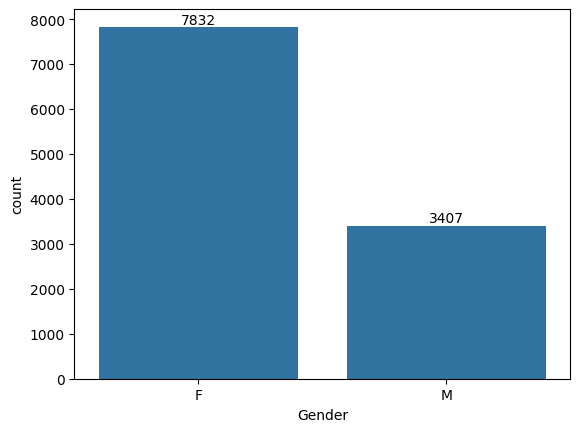

In [19]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Gender', ylabel='Amount'>

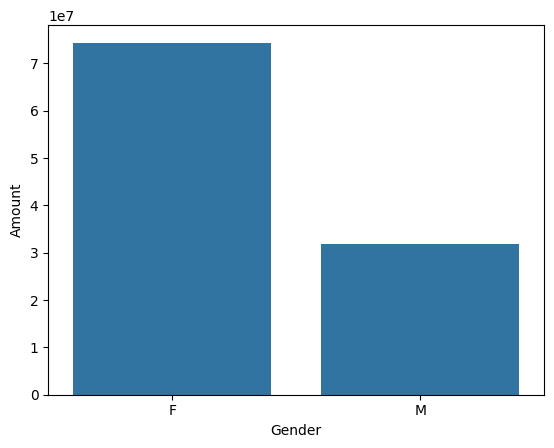

In [20]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

##### From the above graphs we can see that most of the buyers are Females and even the purchasing power of Females is greater than Men

## Age

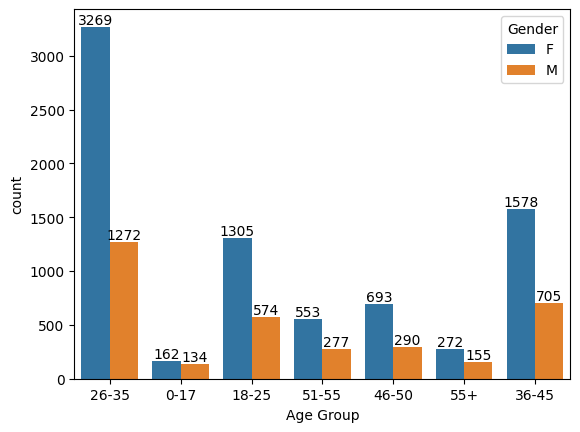

In [21]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

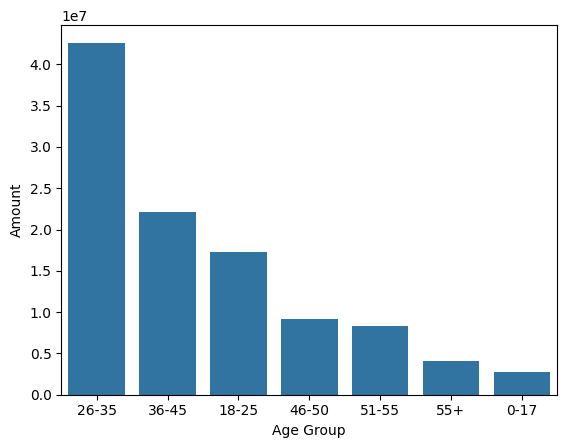

In [22]:
#which age group has spent the most amount
sales_age=df.groupby(['Age Group',],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

##### From the above graphs we can see that most of the buyers are 26-35 years Females

## State

<Axes: xlabel='State', ylabel='Orders'>

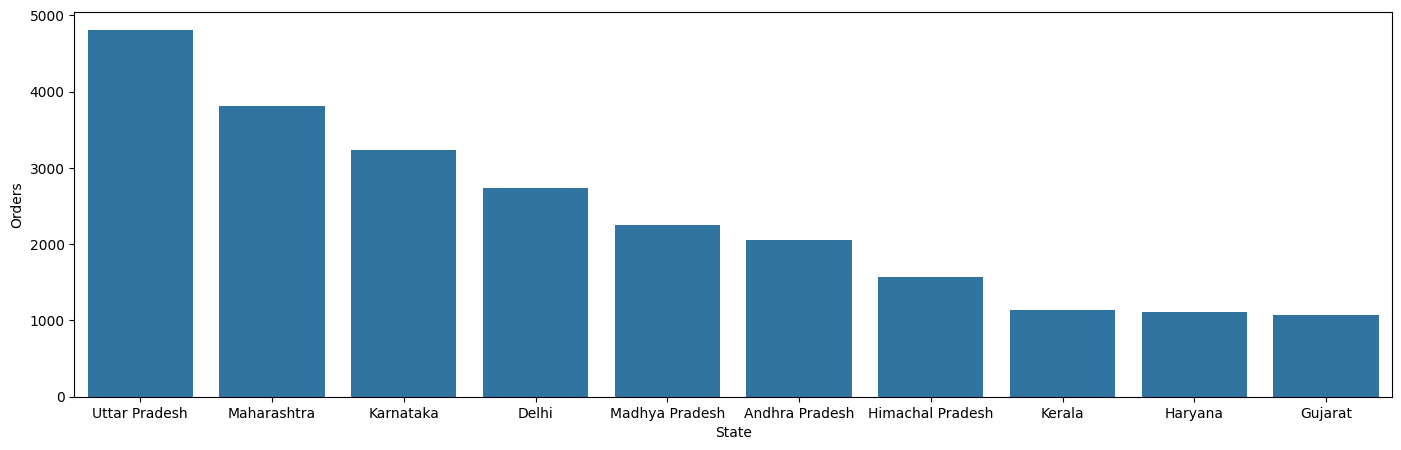

In [23]:
#total orders from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(17,5))
sns.barplot(data=sales_state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

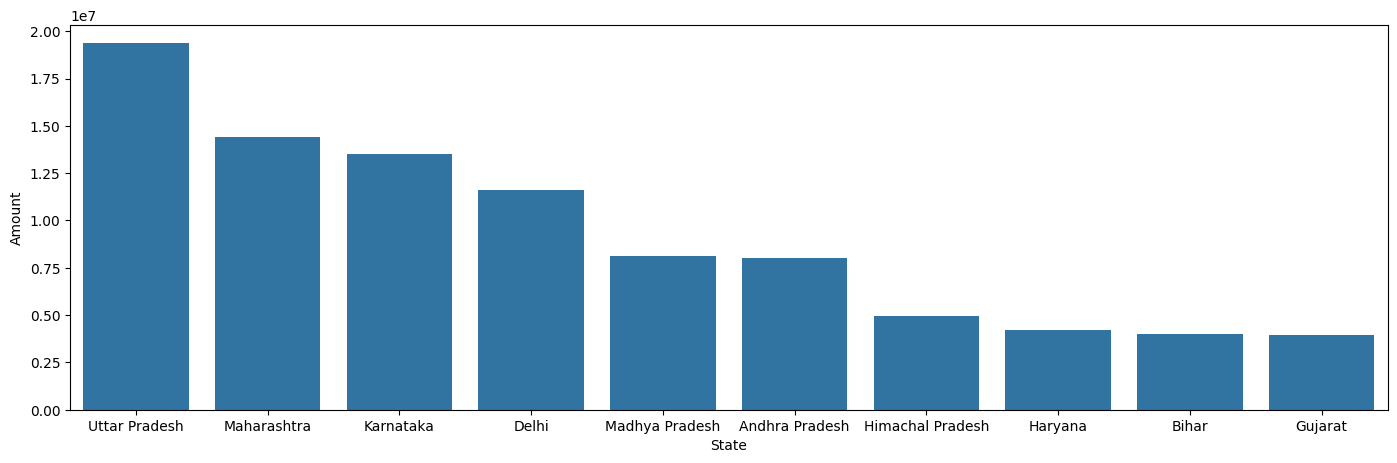

In [24]:
sales_state_amt=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(17,5))
sns.barplot(data=sales_state_amt,x='State',y="Amount")

##### From above Graphs we can see that most of the orders and total sales/amount are from Uttar Pradesh,Maharashtra and Karnataka respectively. 

## Marital Status

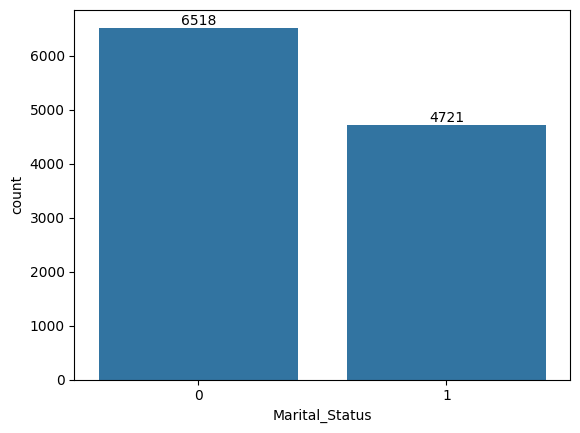

In [25]:
ax=sns.countplot(data=df,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

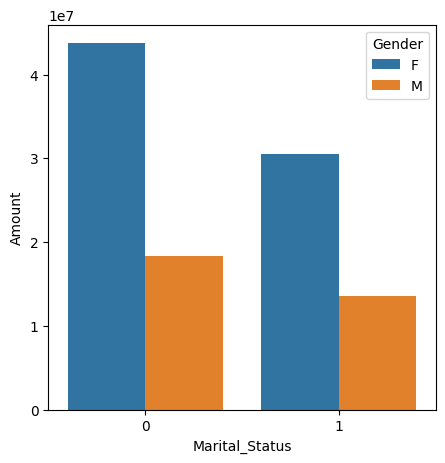

In [26]:
# Check the Amount spent along with the Marital Status as well as Gender 
sales_marital=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(data=sales_marital,x='Marital_Status',y='Amount',hue='Gender')

##### From above Graphs we can see that most buyers are married women as well having high purchasing power

## Occupation

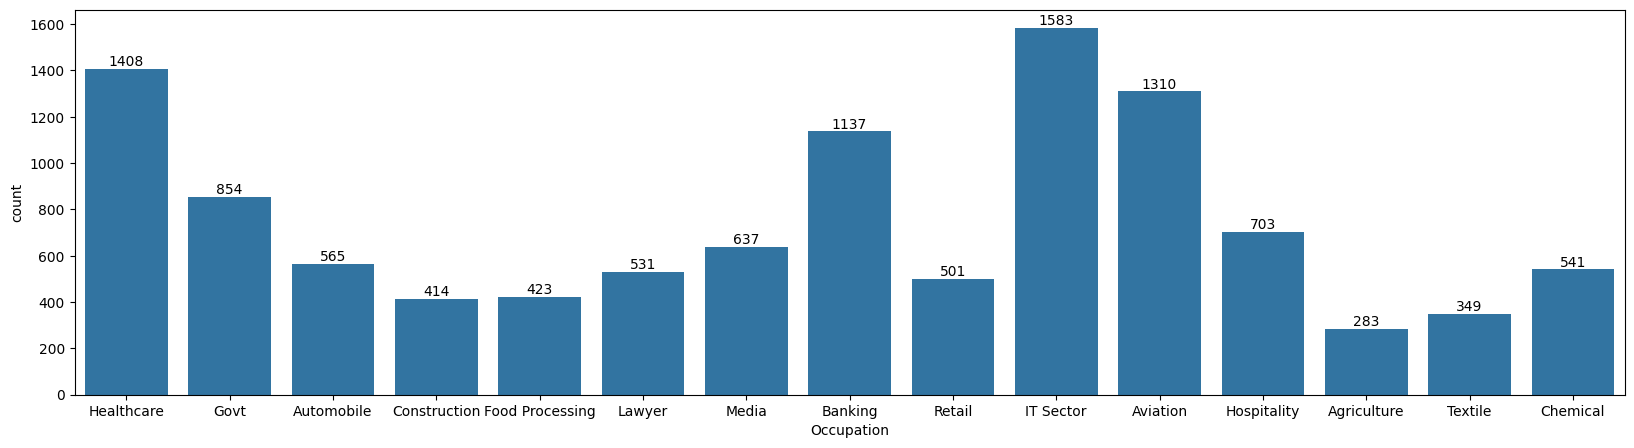

In [27]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

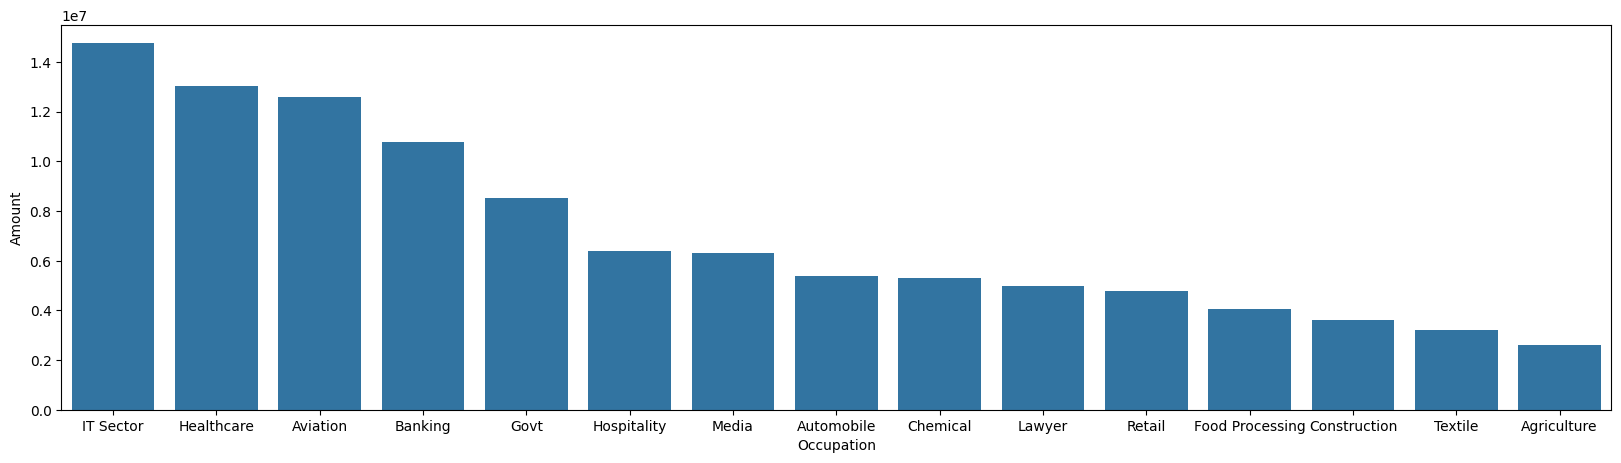

In [28]:
plt.figure(figsize=(20,5))
sales_occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',data=sales_occupation)

##### From the above figure we see that most of the buyers are from IT Sector,Healthcare and Aviation respectively

## Product Category

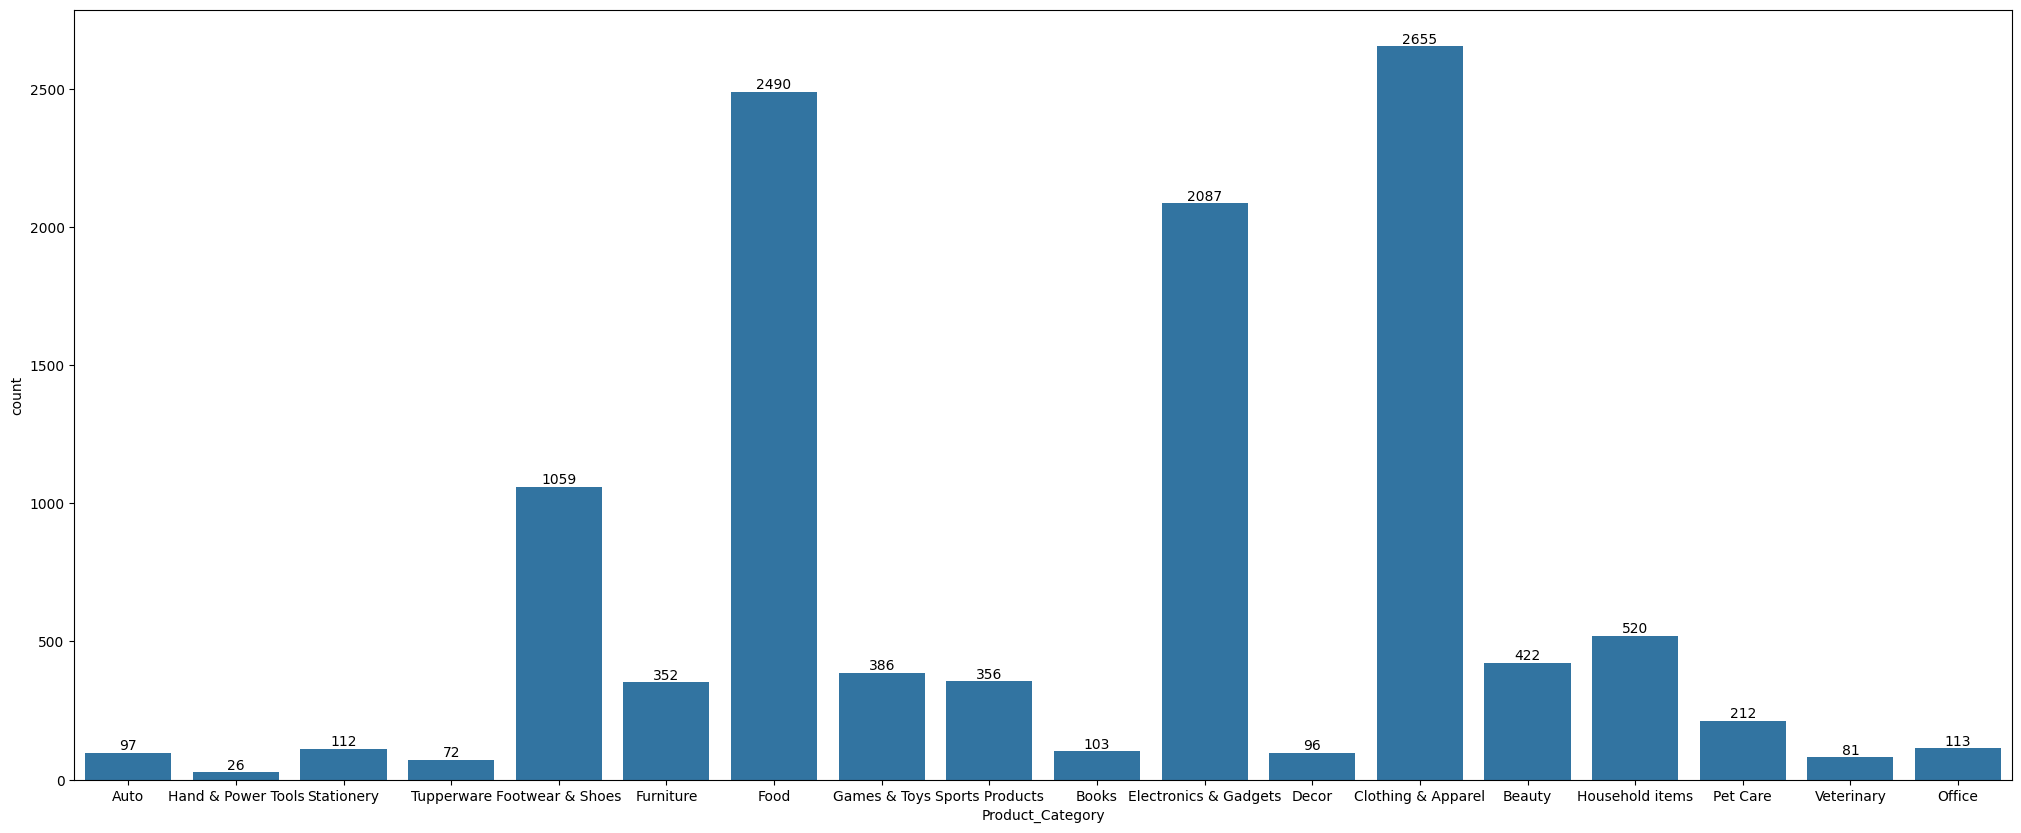

In [29]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

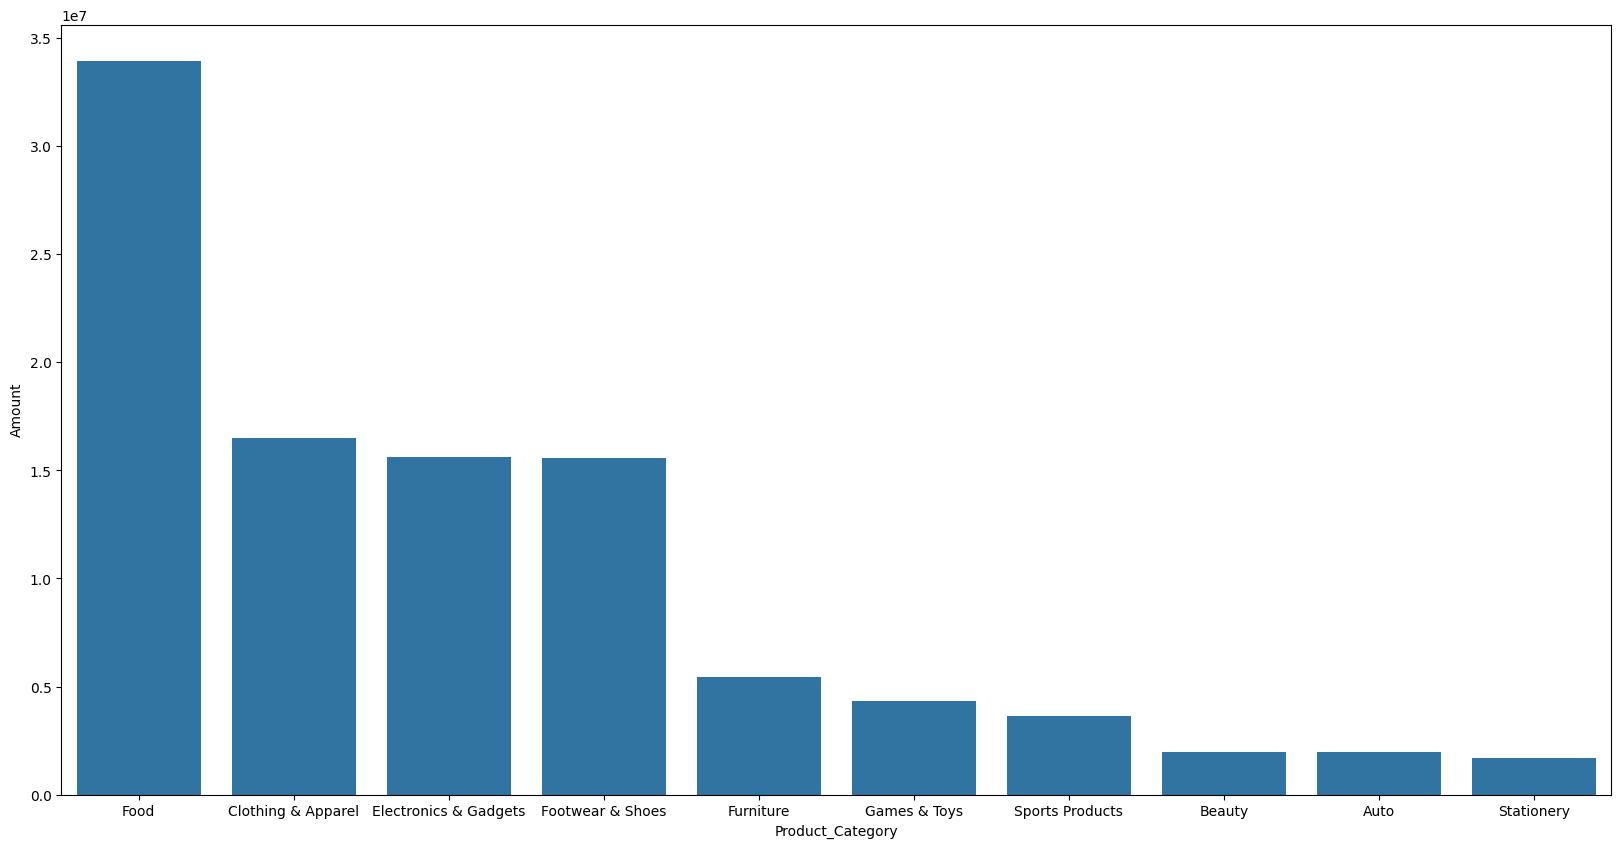

In [30]:
plt.figure(figsize=(20,10))
sales_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=sales_product)


##### From the above graph we see that most selling products are from Food,Clothing and Electronics category respectively

<Axes: xlabel='Product_ID', ylabel='Orders'>

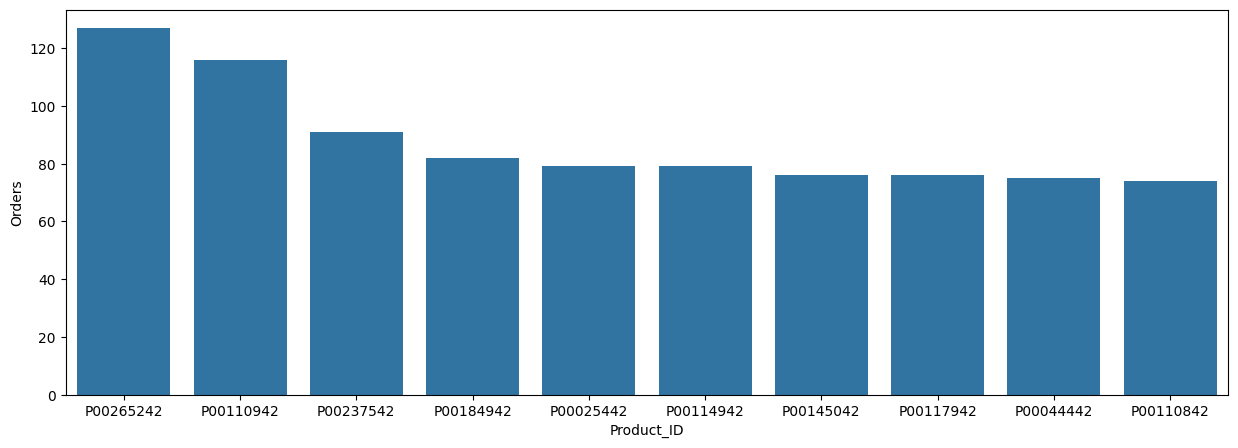

In [31]:
plt.figure(figsize=(15,5))
sales_id=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data=sales_id,x='Product_ID',y='Orders')

##### From the above graph we can see the most sold/ordered Products

# CONCLUSION

 **Married women aged 25-36 from Uttar Pradesh, Maharashtra and Karnataka, working in IT, Healthcare, and Aviation, emerge as the most likely buyers in the Food, Clothing, and Electronics categories.**